## Chargement Des Données



In [1]:
#Chargement de quelques bibliothéques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import ClusterCentroids

In [2]:
#Chargement du DataSet
dt=pd.read_excel("Telco_customer_churn.csv.xlsx")

In [3]:
#Suppression des Colonnes inutiles 
cols=['Country','Count','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Label','Churn Score','CLTV','Churn Reason']
for i in cols:
    dt=dt.drop(i,axis='columns')

In [4]:
#Affichage des 5 premiers Lignes
dt.head(5)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [5]:
print (f"La dimension de notre 'dataSet' est {dt.shape}")

La dimension de notre 'dataSet' est (7043, 21)


## I-Compréhension des données: 
- Résumés Des Données
- Visualisation des données
- Statistiques descriptives


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

**Observation:**  
* Au total, il y a 21 colonnes de données, y compris les types de données int64, float64 et object.   
* presque toutes les données  qui doivent être numériques sont de type flottant ou entier. Une exception se trouve dans la       colonne "TotalCharges"  



In [7]:
# Vérification les plages de valeurs des données
for col in dt:
    print(f'Colonne: {col}')
    print(f'Valueurs: {dt[col].unique()[:5]}')
    print('---')

Colonne: CustomerID
Valueurs: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' '7892-POOKP' '0280-XJGEX']
---
Colonne: Gender
Valueurs: ['Male' 'Female']
---
Colonne: Senior Citizen
Valueurs: ['No' 'Yes']
---
Colonne: Partner
Valueurs: ['No' 'Yes']
---
Colonne: Dependents
Valueurs: ['No' 'Yes']
---
Colonne: Tenure Months
Valueurs: [ 2  8 28 49 10]
---
Colonne: Phone Service
Valueurs: ['Yes' 'No']
---
Colonne: Multiple Lines
Valueurs: ['No' 'Yes' 'No phone service']
---
Colonne: Internet Service
Valueurs: ['DSL' 'Fiber optic' 'No']
---
Colonne: Online Security
Valueurs: ['Yes' 'No' 'No internet service']
---
Colonne: Online Backup
Valueurs: ['Yes' 'No' 'No internet service']
---
Colonne: Device Protection
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Tech Support
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Streaming TV
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Streaming Movies
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Contract
Valueurs: [

**ramarque :**  
* La colonne customer ID est à Eleminer 


### i-Visualisation des Variables discrétes
* saisir le sous-ensemble catégoriel des données
* tirer des remarques 

In [8]:
dt_discrete = dt[dt.select_dtypes(['object']).columns]
dt_discrete = dt_discrete.drop(columns=['CustomerID'])
cols = dt_discrete.columns

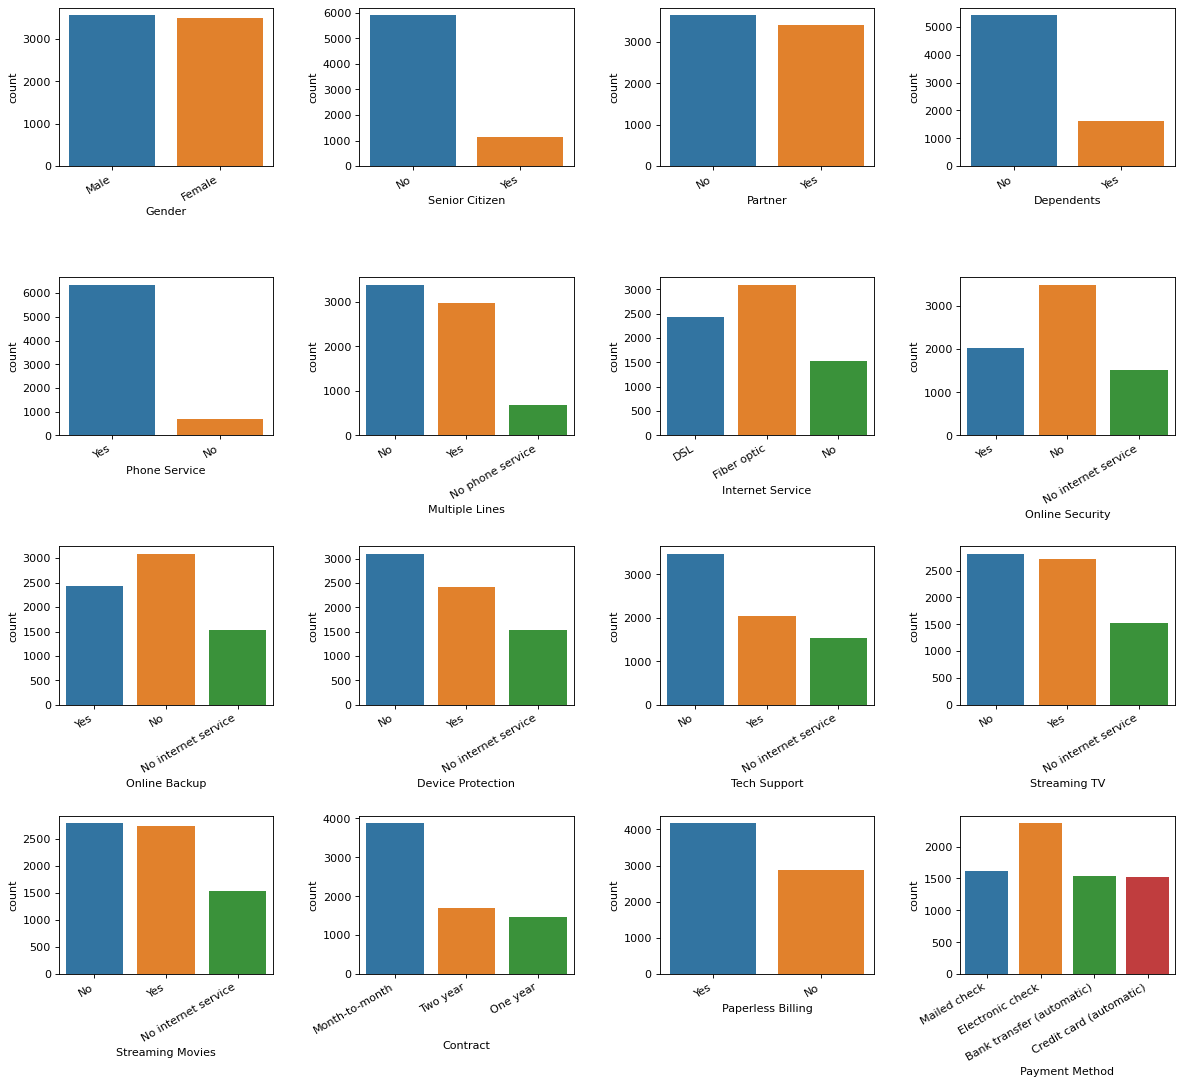

In [9]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.7, wspace=.4)

index = 0
for row in range(4):
    for col in range(4):
        ax = fig.add_subplot(4, 4, index+1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        col = cols[index]
        ax = sns.countplot(x=col, data=dt_discrete)
        index+=1

#### Observation:
Certaines fonctionnalités sont considérablement déséquilibrées, par exemple 'Dependents', 'PhoneService', 'MultipleLines', 'Contract' et 'Churn'.
Surtout Churn semble être critique, puisque c'est le label qui est censé être prédit.

### ii-Contribution des variables Categorielles  à 'Churn Value'

In [10]:
#Selection des variables 
categorical = ['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
'Churn Value']
categorical_dt = dt[categorical]

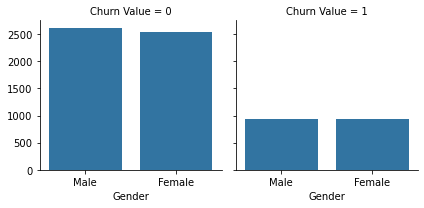

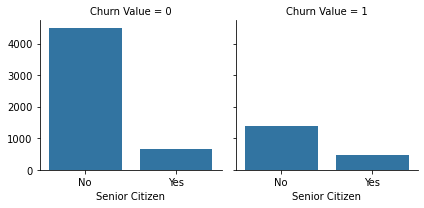

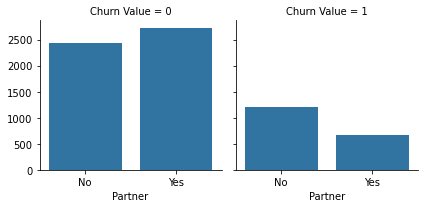

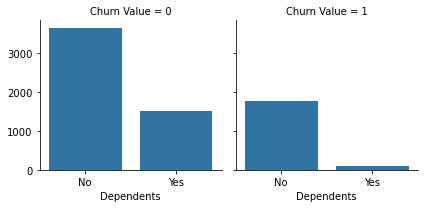

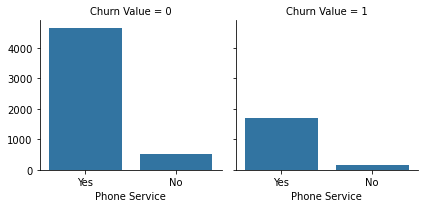

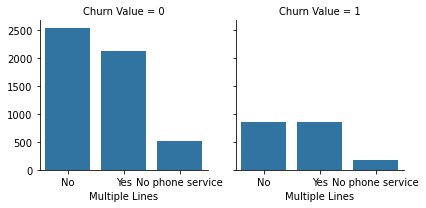

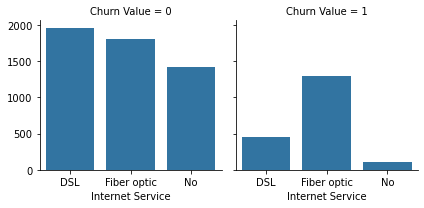

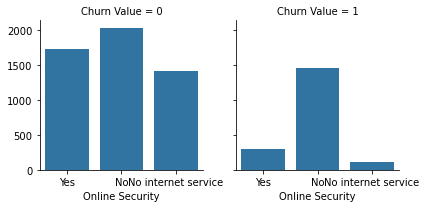

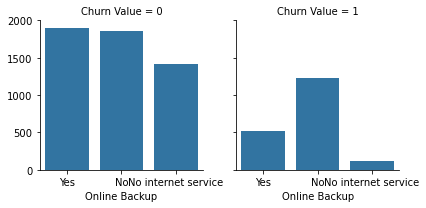

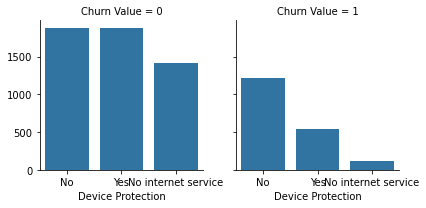

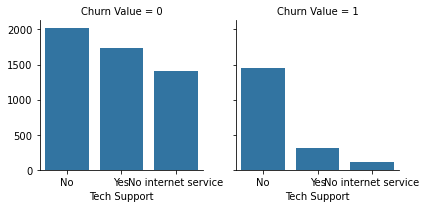

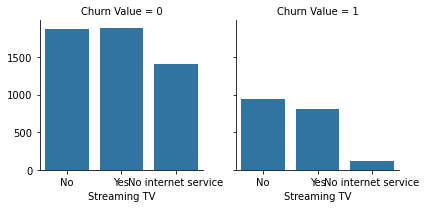

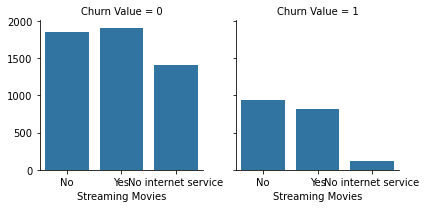

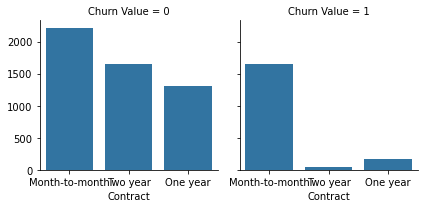

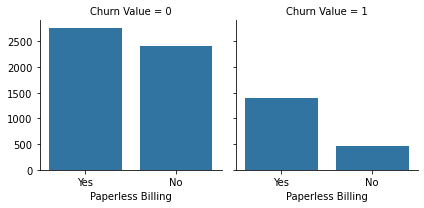

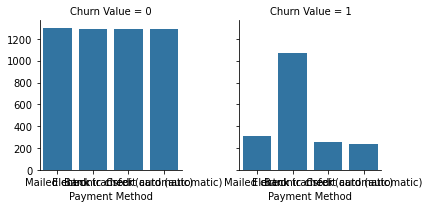

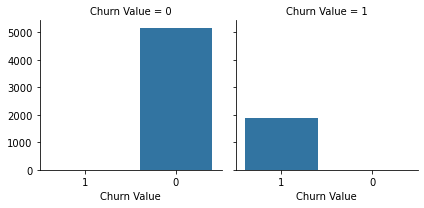

In [11]:
categorial = categorical_dt.columns

index = 0
for index in range(len(categorial)):
    col = categorial[index]
    sns.FacetGrid(categorical_dt, col='Churn Value').map(
        sns.countplot, col, order=categorical_dt[col].unique())

#### Observations 
* 'Gender' ne semble pas être une caractéristique précieuse pour la prévision du taux de désabonnement. Les valeurs sont uniformément réparties
* Les 'senior Citizen' sont presque susceptibles de 'No Churn'. Les jeunes clients sont plus susceptibles de 'Chuen'. Cette hypothèse pourrait être biaisée en raison d'un nombre plus faible de personnes 'Senior citizen' dans l'ensemble de données.
* Les clients sans partenaire sont un peu plus susceptibles de chuter.
* Les clients ayant des personnes à charge sont un peu moins susceptibles de se désabonner.
* Le service téléphonique semble avoir peu d'impact sur la décision du client de meme pour 'Multiple lines'.
* 'Internet Service' a un impact sur le taux de désabonnement. Les clients de la fibre optique sont plus susceptibles de chuter.
* 'Online Security' semble être une caractéristique importante. Les clients sans sécurité en ligne sont plus susceptibles de chuter.
* Le manque de services de sauvegarde en ligne ('Online Backup') augmente la probabilité de désabonnement.
* Le manque de protection de l'appareil ('Device Protection') augmente la probabilité de désabonnement
* Le manque de support technique ('Tec Support') augmente la probabilité de désabonnement.


### i-Visualisation des Variables Continues

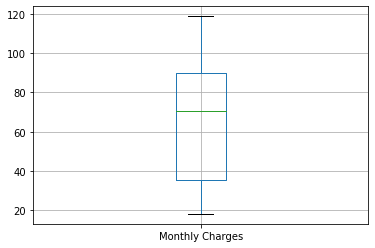

In [12]:
#Boites Moustaches
dt.boxplot('Monthly Charges');

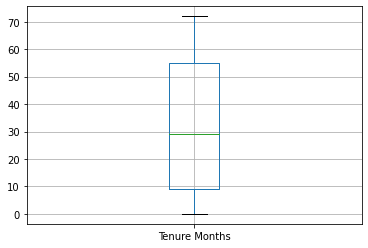

In [13]:
dt.boxplot('Tenure Months');

In [14]:
#des statistique descriptives pour les variables numeriques
dt.drop(columns=['Churn Value']).describe()

,Tenure Months,Monthly Charges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


### ii-Contribution des variables Numeriques  à 'Churn Value'

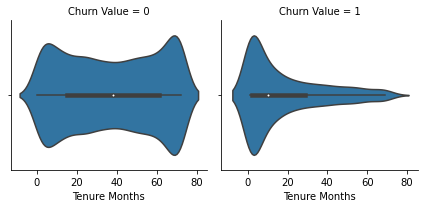

In [15]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Tenure Months', order=[0,1])

#### Observation:
* Les clients à faible 'Tenure Months' sont beaucoup plus susceptibles de se désister.
* Dans le même temps, les clients qui n'ont pas churn sont répartis sur un large éventail de 'Tenure Months'.

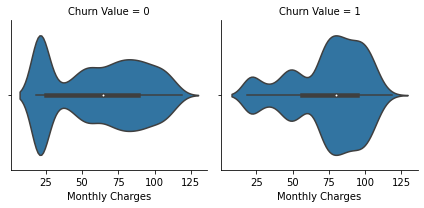

In [16]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Monthly Charges', order=[0,1])

#### Observation:
* Le graphe indique que les 'Monthly Charges' ont un impact significatif sur la décision des clients de 'Churn'.
* Les clients avec des 'Monthly Charges' élevés sont beaucoup plus susceptibles de 'churn' que les clients avec un faible     montant de 'Monthly Charges'. En revanche, les clients dont les 'Monthly Charges' sont bas sont plus susceptibles de 'no Churn'.

## II-Preparation des données
- Valeurs Manquantes
- Conversions des variables de type 'Objet'
- Encodage des variables explicatives
- Application d'une technique d'échantillonnage


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [18]:
dt[dt['Total Charges'] == ' ']
#On remarque qu'il y on a 11 valeurs manquantes pour la colonne Total Charges

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,4472-LVYGI,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,3115-CZMZD,Male,No,No,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,5709-LVOEQ,Female,No,Yes,No,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,1371-DWPAZ,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [19]:
dt = dt[dt['Total Charges'] != ' ']
#Suppression de la Colonne CustomerID
dt = dt.drop('CustomerID',axis=1)
dt.shape

(7032, 20)

In [20]:
#Conversion du type de la colonne 'Total Charges'
dt['Total Charges'] = dt['Total Charges'].astype(np.float64)

In [21]:
dt.notnull().values.any()

True

In [22]:
dt.head(3)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [23]:
dt.shape

(7032, 20)

In [24]:
#Selection des variables Categorielles
obj_cols=dt.select_dtypes(include=['object']).columns.tolist()
obj_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [25]:
#selection du nombre de valeurs differents pour chaque variable
dt.select_dtypes(include=['object']).nunique()

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

In [26]:
dt1 = dt.drop(obj_cols,axis='columns')
#NB:
#dt1 Contient Les Variables Numerique
#dt Contients les variales categorielles 

In [27]:
dic = {}
for col in obj_cols: 
    dic[col] = pd.get_dummies(dt[col]).iloc[:,1:]




In [28]:
data_set=pd.concat([dt1,dic['Gender'],
 dic['Senior Citizen'],
 dic['Partner'],
 dic['Dependents'],
 dic['Phone Service'],
 dic['Multiple Lines'],
 dic['Internet Service'],
 dic['Online Security'],
 dic['Online Backup'],
 dic['Device Protection'],
 dic['Tech Support'],
 dic['Streaming TV'],
 dic['Streaming Movies'],
 dic['Contract'],
 dic['Paperless Billing'],
 dic['Payment Method']], axis=1)

In [29]:
data_set.head(3)

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Yes,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check
0,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,70.70,151.65,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,8,99.65,820.50,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0


In [30]:
data_set.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'No phone service', 'Yes',
       'Fiber optic', 'No', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'One year', 'Two year', 'Yes',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [31]:
#Supression des Colonnes redandants
data_set_T=data_set.T
data_set_T=data_set_T.drop('No internet service')
data_set_T=data_set_T.drop('No phone service')


In [32]:
print(data_set_T.index.tolist())
len(data_set_T.index.tolist())

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Two year', 'Yes', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


24

In [33]:
rows_names=['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Male',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Fiber optic',
 'No internet service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'One year',
 'Two year',
 'Paperless_Billing',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check']

len(rows_names)

24

In [34]:
#Réglage Des Noms des Variables
data_set_T.index=rows_names

In [35]:
data_set=data_set_T.T

In [36]:
#Réglage de l'index 
data_set.index=(range(7032))

In [37]:
#Notre DataSet Aprés Transformation 
data_set

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,One year,Two year,Paperless_Billing,Credit card (automatic),Electronic check,Mailed check
0,2.0,53.85,108.15,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,70.70,151.65,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8.0,99.65,820.50,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,28.0,104.80,3046.05,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49.0,103.70,5036.30,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,72.0,21.15,1419.40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7028,24.0,84.80,1990.50,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7029,72.0,103.20,7362.90,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7030,11.0,29.60,346.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


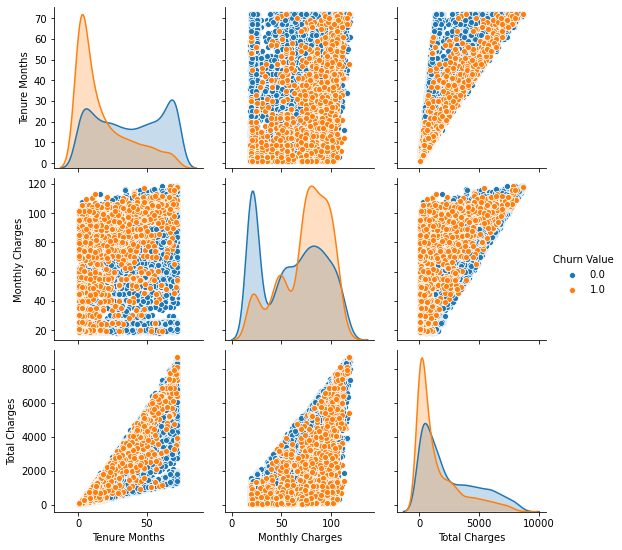

In [38]:
#Visualisation du croisement deux à deux des variables Numériques
sns.pairplot(data_set.iloc[:,:4],hue="Churn Value")
plt.show()

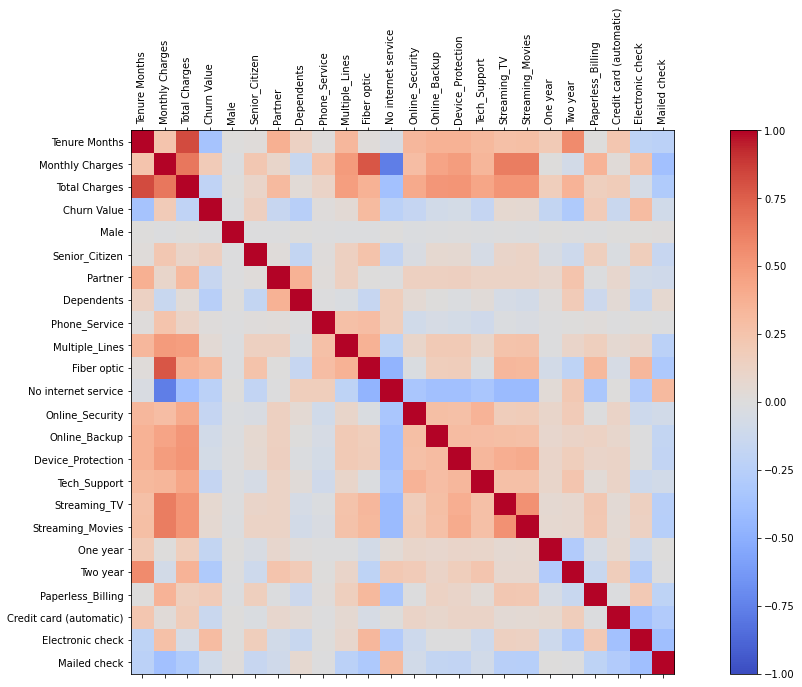

In [39]:
#Visualisation de La Corrélation entre Les Différentes Variables
corr = data_set.corr()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_set.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_set.columns)
ax.set_yticklabels(data_set.columns)
plt.show()

 <h2 style="color : blue;">Observations consernant le Graphe de corrélation</h2>
     <b>Les Variables Corrélées positivement sont</b>:<br>
    (Fiber Optic,Monthly Charges) et (Total Charges,Tenure Months)<br>
     <b>Les Variables Corrélées Négativement sont</b>:<br>
    (No Internet Service,Monthly Charges) et (No Internet Service,Fiber Optic)

In [40]:
#Separation de la Colonne sible des autres variables
X =  data_set.drop(['Churn Value'], axis=1)
y = data_set['Churn Value']


In [41]:
#Application d'une Technique d'Echantillonnage
from imblearn.under_sampling import ClusterCentroids
clusters = ClusterCentroids(sampling_strategy='auto',random_state = 1)
clusters.fit(X,y)
X_cluster_sampled,y_cluster_sampled = clusters.fit_resample(X,y)

In [42]:
#Diviser les données (70% Apprentissage et 30% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cluster_sampled, y_cluster_sampled, test_size = 0.3, random_state = 0)


In [43]:
#Centrage-Réduction des données (Standardisation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##  III-Modélisation 

### i-KNN

Text(0, 0.5, 'Erreur')

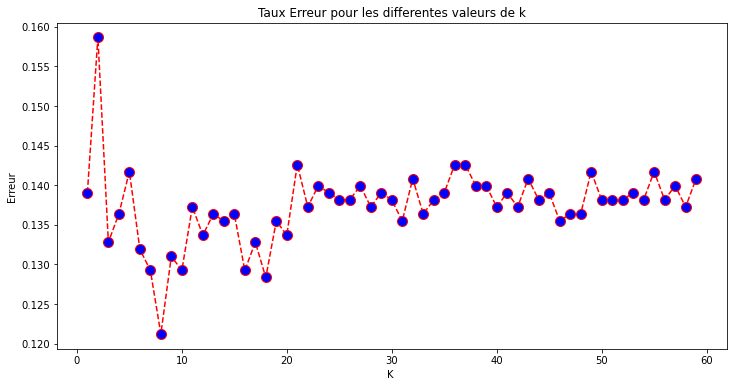

In [44]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 45 et la distance Manhattan
for i in range(1, 60):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

#### Observation
* 0<K<8: Sous Apprentissage
* K=8  : Apprentissage Approprié
* 8<K  : Sur Apprentissage


In [45]:
#Instanciation de KNeighborsClassifier avec les paramétres appropriées
knn = KNeighborsClassifier(8,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [46]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.88


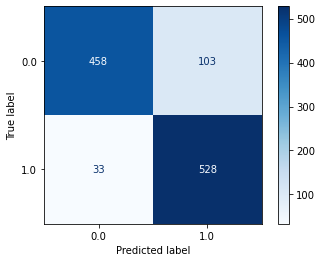

In [47]:
#Matrice De Confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [48]:
#Rapport D'Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       561
         1.0       0.84      0.94      0.89       561

    accuracy                           0.88      1122
   macro avg       0.88      0.88      0.88      1122
weighted avg       0.88      0.88      0.88      1122



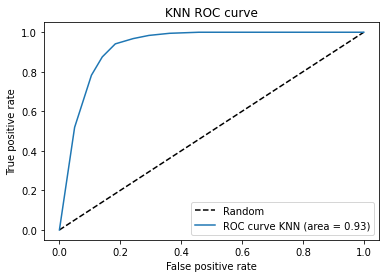

In [49]:
#Courbe ROC 
y_pred_proba_knn=knn_model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve KNN (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc='best')

In [50]:
score_Knn={
'accuracy' : 0.87,
'precision': 0.83,    
'recall':0.93,
'f1-score':0.88,
'confusion_Mat':[455,106,37,524]
}

### ii-DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
#Création d'Une Instance de DecisionTreeClassifier
dta = DecisionTreeClassifier(random_state=0)

In [53]:
#Application du modéle 
dta.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
print('Le train score est :', dta.score(X_train, y_train))
print('Le test score est :', dta.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.8627450980392157


In [55]:
#On remarque que Le train score est : 1.0 -> On a un Sur Apprentissage

In [56]:
data=data_set.drop(['Churn Value'], axis=1)
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [57]:
#Importation de la Bibliothéque GridSearchCV
from sklearn.model_selection import GridSearchCV

In [58]:
#Instanciation de GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [59]:
#Recherche des hypers-paramétre 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [60]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [61]:
#Modéle avec les hypers-paramétres
final_model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=7)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

In [62]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.9094036697247706
le test_score= 0.8627450980392157


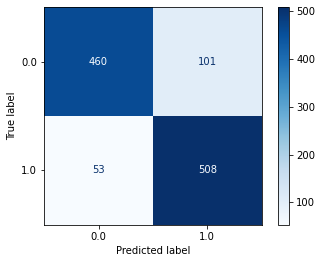

In [63]:
#Matrice de Confusion 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [64]:
#Rapport sur la performance du Modéle
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       561
         1.0       0.83      0.91      0.87       561

    accuracy                           0.86      1122
   macro avg       0.87      0.86      0.86      1122
weighted avg       0.87      0.86      0.86      1122



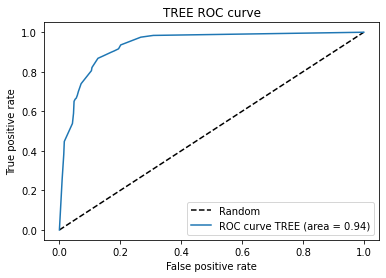

In [65]:
#Courbe ROC 
y_pred_proba_tree=final_model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve TREE (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('TREE ROC curve')
plt.legend(loc='best')

In [66]:
score_Tree={
'accuracy':0.86,
'precision': 0.83,    
'recall':0.91,
'f1-score':0.87,
'confusion_Mat':[453,108,49,512]
}

### iii-RandomForestClassifier

In [67]:
#Importation de la bibl RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
#Instanciation de RandomForestClassifier
random_classifier= RandomForestClassifier()
#Appliication du Modéle sur les données d'apprentissage
random_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
#Appliication du Modéle sur les données de Test
y_pred= random_classifier.predict(X_test)

Text(91.68, 0.5, 'predicted label')

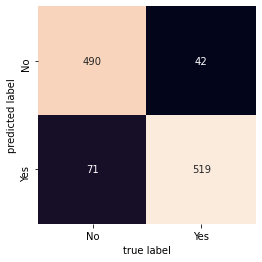

In [70]:
from sklearn.metrics import confusion_matrix 
#Matrice de Confusion 
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [71]:
#Elaboration d'Un rapprt sur La performance du Modéle
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       561
         1.0       0.88      0.93      0.90       561

    accuracy                           0.90      1122
   macro avg       0.90      0.90      0.90      1122
weighted avg       0.90      0.90      0.90      1122



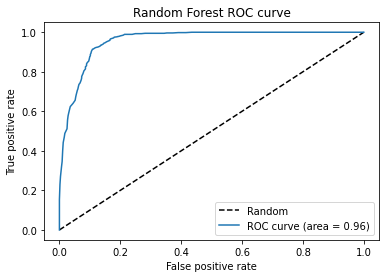

In [72]:
#Courbe ROC 
y_pred_proba=random_classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')

In [73]:
score_RF={
'accuracy' : 0.89,
'precision': 0.87,    
'recall':0.93,
'f1-score':0.90,
'confusion_Mat':[481,41,80,520]
}

### iiii-SVM Support Vector Machines

In [74]:
from sklearn.svm import SVC
#Instantiation de SVC
svm_classifier= SVC(probability=True)

In [75]:
#Application Du Modéle
svm_classifier.fit(X_train,y_train)

SVC(probability=True)

In [76]:
#Prédiction 
y_pred_svm= svm_classifier.predict(X_test)

Text(91.68, 0.5, 'predicted label')

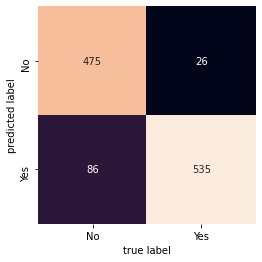

In [77]:
#Matrice De Confusion
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [78]:
#Rapport de Classification
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89       561
         1.0       0.86      0.95      0.91       561

    accuracy                           0.90      1122
   macro avg       0.90      0.90      0.90      1122
weighted avg       0.90      0.90      0.90      1122



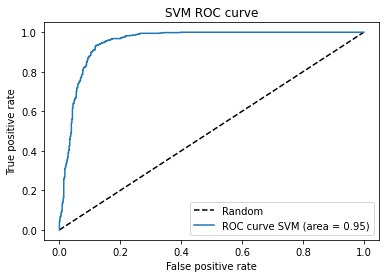

In [79]:
#Courbe ROC 
y_pred_proba_SVM=svm_classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_SVM)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve SVM (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')

In [80]:
score_SVM={
'accuracy':0.9,
'precision': 0.85,    
'recall':0.96,
'f1-score':0.9,
'confusion_Mat':[469,22,92,539]
}

### iiiii-Naîve Bayes

In [81]:
#transformer les catégories de chaque caractéristique comme des valeurs numériques:
from sklearn.preprocessing import LabelEncoder
encodeur = LabelEncoder()
for col in dt.columns:
    dt[col] = encodeur.fit_transform(dt[col])

In [82]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
col_names = list(dt.columns)
mm_scaler = preprocessing.MinMaxScaler()
dt = mm_scaler.fit_transform(dt)
dt = pd.DataFrame(dt, columns=col_names)
dt.describe()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.230375,0.442560,0.903299,0.470279,0.436291,0.394625,0.452929,0.451934,0.398180,0.492463,0.496445,0.344283,0.592719,0.524412,0.431742,0.474955,0.265785
std,0.500014,0.368844,0.499729,0.421103,0.345708,0.295571,0.474314,0.368636,0.429981,0.440197,0.440089,0.430837,0.442642,0.442692,0.416467,0.491363,0.355835,0.302021,0.297559,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.126816,0.211326,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.455464,0.469367,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.760563,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.688092,0.732463,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X1 =  dt.drop(['Churn Value'], axis=1)
y1 = dt['Churn Value']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [84]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score
from sklearn.naive_bayes import MultinomialNB
nb1 = {'multinomial': MultinomialNB()}
scores = {}
s1 = cross_val_score(MultinomialNB(), X1_train, y1_train, cv=5, scoring='accuracy')
scores['multinomial'] = np.mean(s1)
scores

{'multinomial': 0.7939919937270439}

In [85]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7805890852830849, 'bernoulli': 0.8310422839461123}

In [86]:
# modele à retenir
modele = BernoulliNB()
modele.fit(X_train, y_train)

BernoulliNB()

<h2 style="color : blue;">Sélection séquentielle des fonctionnalités Basé sur Naive Bayes</h2>

→ Applicaton des différents méthodes de selection(SBS,SFS,SBFS,SFFS)


<h3 style = "color:green;">Sequential Forward Selection</h3>

In [87]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [88]:
#Construction des modéles avec les différents variables
lr = BernoulliNB()
sfs1 = SFS(estimator=lr, 
           k_features=(1, 23),
           forward=True, 
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X_train, y_train)

In [89]:
#best Features(les Variables les plus pertinents)
for i in sfs1.k_feature_names_:
    print (X.columns[int(i)])

Monthly Charges
Senior_Citizen
Dependents
Phone_Service
Multiple_Lines
Online_Security
One year
Two year
Paperless_Billing
Credit card (automatic)
Mailed check


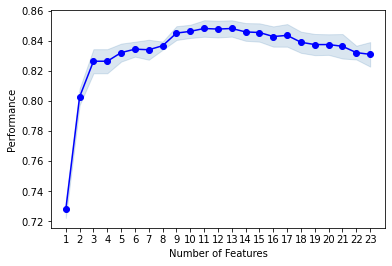

In [90]:
#accuracy= f(k)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs1.get_metric_dict(), kind='std_err');

In [91]:
print('Best accuracy score: %.2f' % sfs1.k_score_)

Best accuracy score: 0.85


<h3 style = "color:green;">Sequential Backward Selection</h3>

In [92]:
#Construction des modéles avec les différents Nombres de variables
lr = BernoulliNB()
sbs = SFS(estimator=lr, 
           k_features=(1,23),
           forward=False,  
           scoring='accuracy',
           cv=5)
sbs = sbs.fit(X_train, y_train)

In [93]:
#best Features(les Variables les plus pertinents)
for i in sbs.k_feature_names_:
    print (X.columns[int(i)])

Tenure Months
Monthly Charges
Male
Partner
Dependents
Phone_Service
Multiple_Lines
Fiber optic
No internet service
Online_Security
Online_Backup
Device_Protection
Tech_Support
Streaming_TV
Streaming_Movies
One year
Paperless_Billing
Mailed check


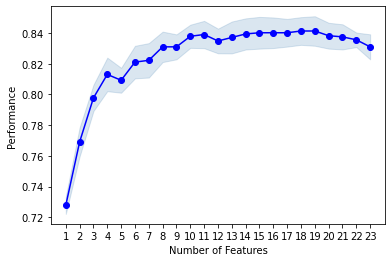

In [94]:
#accuracy= f(k)
plot_sfs(sbs.get_metric_dict(), kind='std_err');

In [95]:
print('Best accuracy score: %.2f' % sbs.k_score_)

Best accuracy score: 0.84


<h3 style = "color:green;">Sequential Forward Floating Selection</h3>

In [96]:
#Construction des modéles avec les différents variables
sffs = SFS(lr, 
           k_features=(1, 23), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X_train, y_train)

In [97]:
#best Features(les Variables les plus pertinents)
for i in sffs.k_feature_names_:
    print (X.columns[int(i)])

Monthly Charges
Male
Senior_Citizen
Dependents
Phone_Service
Multiple_Lines
Online_Security
Streaming_Movies
One year
Two year
Paperless_Billing
Credit card (automatic)
Mailed check


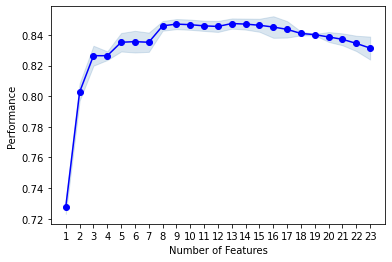

In [98]:
#accuracy= f(k)
plot_sfs(sffs.get_metric_dict(), kind='std_err');

In [99]:
print('Best accuracy score: %.2f' % sffs.k_score_)

Best accuracy score: 0.85


<h3 style = "color:green;">Sequential Backward Floating Selection</h3>

In [100]:
#Construction des modéles avec les différents variables
sbfs = SFS(lr, 
           k_features=(1, 23), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X_train, y_train)

In [101]:
#best Features(les Variables les plus pertinents)
for i in sbfs.k_feature_names_:
    print (X.columns[int(i)])

Dependents
Fiber optic
Online_Security
Online_Backup
Device_Protection
One year
Two year
Paperless_Billing
Credit card (automatic)
Mailed check


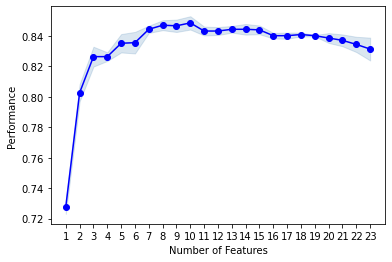

In [102]:
#accuracy= f(k)
plot_sfs(sbfs.get_metric_dict(), kind='std_err');

In [103]:
print('Best accuracy score: %.2f' % sbfs.k_score_)

Best accuracy score: 0.85


<h2 style="color:blue;">Application de La Classification de Naive Bayes Sans Selection de Fonctionnalités</h2>

In [104]:
#Les prédictions
y_pred = modele.predict(X_test)

#évaluation de notre modèle
print ("précision: ", accuracy_score(y_test, y_pred))
print ("précision: ", modele.score(X_test, y_test))

précision:  0.8342245989304813
précision:  0.8342245989304813


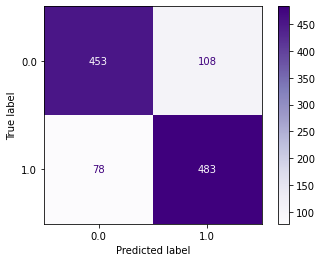

In [105]:
# matrice de Confusion 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modele, X_test, y_test, cmap="Purples")

In [106]:
# Rapport De Classification
from sklearn.metrics import classification_report,recall_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       561
         1.0       0.82      0.86      0.84       561

    accuracy                           0.83      1122
   macro avg       0.84      0.83      0.83      1122
weighted avg       0.84      0.83      0.83      1122



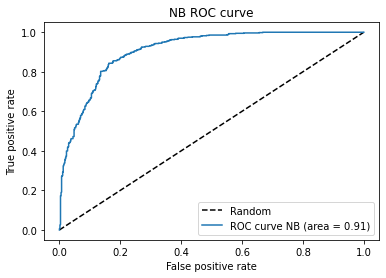

In [107]:
#Courbe ROC 
y_pred_proba_NB=modele.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_NB)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve NB (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NB ROC curve')
plt.legend(loc='best')

In [108]:
score_NB={
'accuracy':0.84,
'precision': 0.82,    
'recall':0.86,
'f1-score':0.84,
'confusion_Mat':[458,103,78,483]
}

### iiiiii-Réseau de Neuronnes Artificiel

In [109]:
from sklearn.neural_network import MLPClassifier

In [110]:
mlp = MLPClassifier(alpha=1, max_iter=200, random_state=1)

In [112]:
#Parmis ses paramétres On va chercher les meilleurs
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [113]:
gridsearchcv = GridSearchCV(mlp, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(alpha=1, random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [114]:
print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [115]:
mlp = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (100, 50),learning_rate= 'constant',solver= 'adam')

In [116]:
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 50))

In [117]:
#Les prédictions
y_pred = mlp.predict(X_test)

print ("précision: ", accuracy_score(y_test, y_pred))
print ("précision: ", mlp.score(X_test, y_test))

précision:  0.8761140819964349
précision:  0.8761140819964349


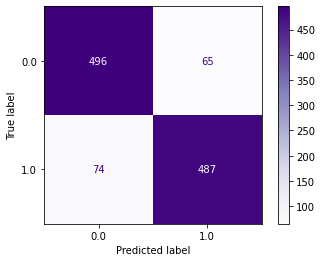

In [118]:
# matrice de Confusion 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp, X_test, y_test, cmap="Purples")

In [119]:
# Rapport De Classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       561
         1.0       0.88      0.87      0.88       561

    accuracy                           0.88      1122
   macro avg       0.88      0.88      0.88      1122
weighted avg       0.88      0.88      0.88      1122



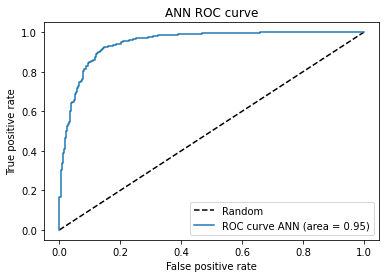

In [121]:
#Courbe ROC 
y_pred_proba_ANN=mlp.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ANN)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve ANN (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ANN ROC curve')
plt.legend(loc='best')

In [123]:
score_Ann={
'accuracy':0.88,
'precision': 0.88,    
'recall':0.87,
'f1-score':0.88,
'confusion_Mat':[496,65,74,487]
}

## V- Comparaison entre Les Modéles

In [124]:
metrics = {}
for metric in score_Ann.keys():
     metrics[metric]=[score_Knn[metric],score_Tree[metric],score_RF[metric],score_SVM[metric],
    score_NB[metric],score_Ann[metric]]

In [125]:
modelnames=['Knn','Decision_Tree','Random_Forest','SVM','Naive_Bayes','Artificial_NN']

In [126]:
metrics['ModelNames']=modelnames

In [127]:
model_summary=pd.DataFrame(metrics)

In [128]:
model_summary=model_summary[['ModelNames','accuracy','precision','recall','f1-score','confusion_Mat']]
model_summary.columns=['Model Names','accuracy','Precision','Recall','f1 Score','Confusion Mat']

In [129]:
model_summary=model_summary.set_index('Model Names')

In [130]:
#Tableau Récapitulaif
model_summary

,accuracy,Precision,Recall,f1 Score,Confusion Mat
Model Names,,,,,
Knn,0.87,0.83,0.93,0.88,"[455, 106, 37, 524]"
Decision_Tree,0.86,0.83,0.91,0.87,"[453, 108, 49, 512]"
Random_Forest,0.89,0.87,0.93,0.90,"[481, 41, 80, 520]"
SVM,0.90,0.85,0.96,0.90,"[469, 22, 92, 539]"
Naive_Bayes,0.84,0.82,0.86,0.84,"[458, 103, 78, 483]"
Artificial_NN,0.88,0.88,0.87,0.88,"[496, 65, 74, 487]"


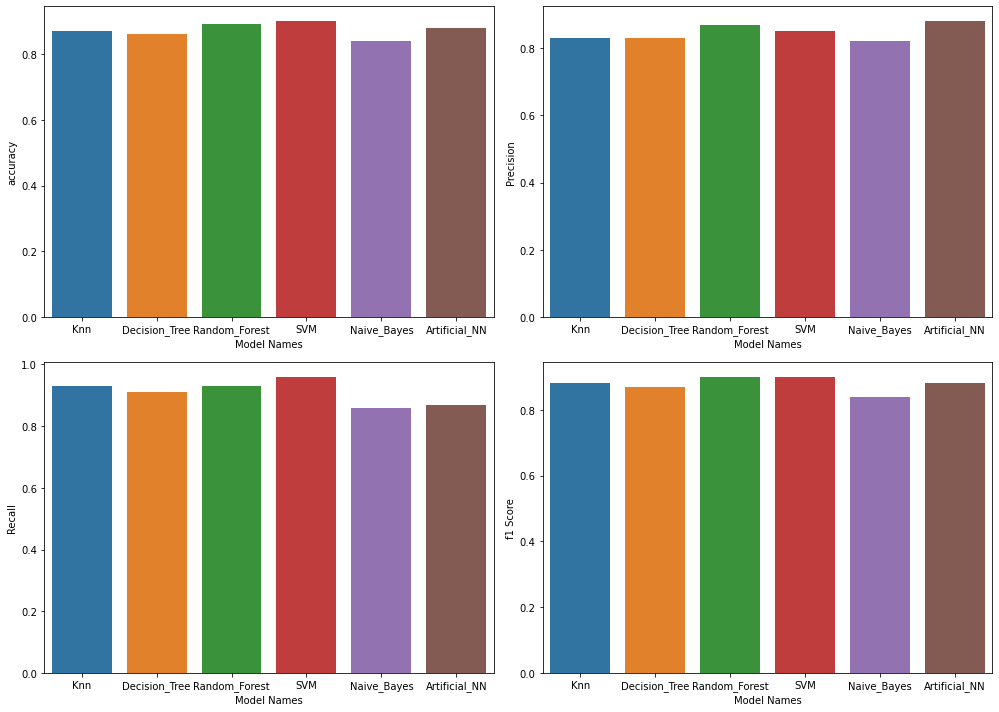

In [131]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,10))

sns.barplot(model_summary.index,model_summary['accuracy'],ax=ax[0,0])

sns.barplot(model_summary.index,model_summary['Precision'],ax=ax[0,1])

sns.barplot(model_summary.index,model_summary['Recall'],ax=ax[1,0])

sns.barplot(model_summary.index,model_summary['f1 Score'],ax=ax[1,1])

plt.tight_layout()

# Ségmentation

In [132]:
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs

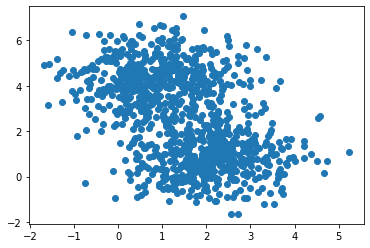

In [133]:
X =  data_set.drop(['Churn Value'], axis=1) #Elimination de la colonne du Label
x, y = make_blobs(n_samples=1000, centers=2,random_state=0)
plt.scatter(x[:,0], x[:,1])

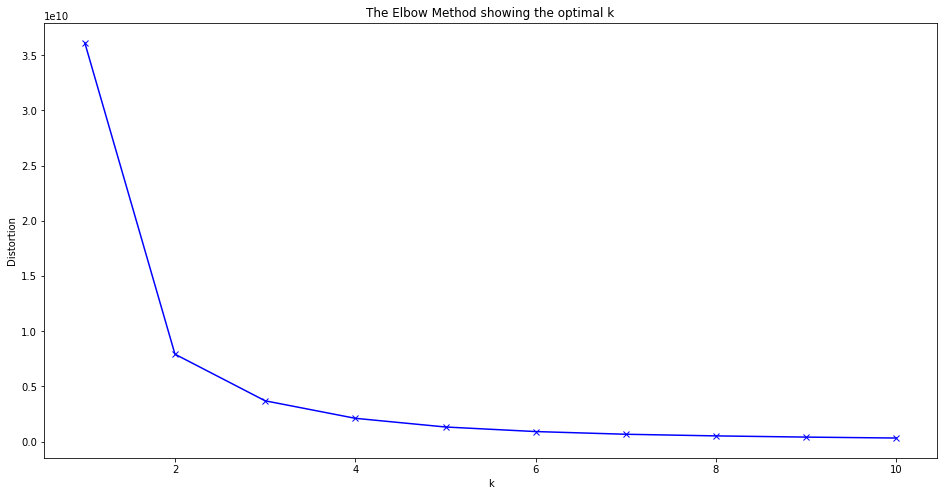

In [134]:
# kmeans
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [135]:
model=KMeans(n_clusters=2)
predicts=model.fit_predict(X)


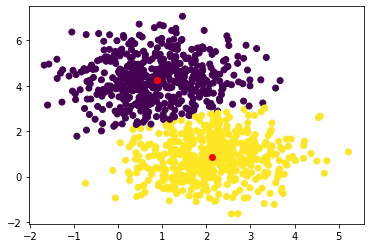

In [136]:
plt.scatter(x[:,0], x[:,1],c=model.fit_predict(x))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')

In [137]:
model.fit(X)
#correspondance avec les groupes réels 
pd.crosstab(data_set['Churn Value'],model.labels_)

col_0,0,1
Churn Value,,
0.0,1769,3394
1.0,321,1548
